<a href="https://colab.research.google.com/github/animeshjanai/pyspark_project_K_Means_clustering/blob/main/pyspark_unsupervised_ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%pip install pyspark py4j -qq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('PySpark_for_DataScience').getOrCreate()

## Data Import

In [ ]:
df = spark.read.csv(
    '/content/drive/My Drive/Datasets/PysparkOnColab/spotify_weekly_chart.csv',
    sep = ',',
    header = True,
    )

df.printSchema()

root
 |-- Pos: string (nullable = true)
 |-- P+: string (nullable = true)
 |-- Artist: string (nullable = true)
 |-- Title: string (nullable = true)
 |-- Wks: string (nullable = true)
 |-- Pk: string (nullable = true)
 |-- (x?): string (nullable = true)
 |-- Streams: string (nullable = true)
 |-- Streams+: string (nullable = true)
 |-- Total: string (nullable = true)



In [ ]:
df.show()

+---+---+---------------+--------------------+---+---+----+--------+----------+----------+
|Pos| P+|         Artist|               Title|Wks| Pk|(x?)| Streams|  Streams+|     Total|
+---+---+---------------+--------------------+---+---+----+--------+----------+----------+
|  1|  =|   Miley Cyrus |             Flowers|  7|  1|   7|56744018|-5019054.0| 585390148|
|  2|NEW|       KAROL G |                 TQG|  1|  2|   1|53284451|      NULL|  53284451|
|  3|NEW|    The Weeknd |         Die For You|  1|  3|   1|46213370|      NULL|  46213370|
|  4| -2|           SZA |           Kill Bill| 12|  1|   2|45630547| -918530.0| 556085332|
|  5| -2|PinkPantheress |  Boy's a liar Pt. 2|  4|  3|   1|39475419|  303113.0| 123300074|
|  6| -2|      Bizarrap |Shakira: Bzrp Mus...|  8|  2|   3|33570215|-1211086.0| 368811104|
|  7| -1|  Metro Boomin |            Creepin'| 13|  2|   1|29727331|  497184.0| 409991076|
|  8| -3|  Harry Styles |           As It Was| 48|  1|  11|29028467| -504076.0|1953960590|

## Updating schema

In [ ]:
from pyspark.sql.types import *

data_schema = [
    StructField('Pos',  IntegerType(), True),
    StructField('P+', StringType(), True),
    StructField('Artist', StringType(), True),
    StructField('Title', StringType(), True),
    StructField('Wks', IntegerType(), True),
    StructField('Pk', IntegerType(), True),
    StructField('(x?)', StringType(), True),
    StructField('Streams', IntegerType(), True),
    StructField('Streams+', DoubleType(), True),
    StructField('Total', IntegerType(), True)
]

final_struct = StructType(fields= data_schema)

In [ ]:
df = spark.read.csv(
    '/content/drive/My Drive/Datasets/PysparkOnColab/spotify_weekly_chart.csv',
    sep = ',',
    header = True,
    schema = final_struct
    )

df.printSchema()

root
 |-- Pos: integer (nullable = true)
 |-- P+: string (nullable = true)
 |-- Artist: string (nullable = true)
 |-- Title: string (nullable = true)
 |-- Wks: integer (nullable = true)
 |-- Pk: integer (nullable = true)
 |-- (x?): string (nullable = true)
 |-- Streams: integer (nullable = true)
 |-- Streams+: double (nullable = true)
 |-- Total: integer (nullable = true)



## Exploring data

In [ ]:
df.limit(5).toPandas()

,Pos,P+,Artist,Title,Wks,Pk,(x?),Streams,Streams+,Total
0,1,=,Miley Cyrus,Flowers,7,1,7,56744018,-5019054.0,585390148
1,2,NEW,KAROL G,TQG,1,2,1,53284451,NaN,53284451
2,3,NEW,The Weeknd,Die For You,1,3,1,46213370,NaN,46213370
3,4,-2,SZA,Kill Bill,12,1,2,45630547,-918530.0,556085332
4,5,-2,PinkPantheress,Boy's a liar Pt. 2,4,3,1,39475419,303113.0,123300074


In [ ]:
df.count()

200

## Column manipulation

In [ ]:
df = df.withColumnRenamed('Pos', 'Rank')

df.show(5)

+----+---+---------------+------------------+---+---+----+--------+----------+---------+
|Rank| P+|         Artist|             Title|Wks| Pk|(x?)| Streams|  Streams+|    Total|
+----+---+---------------+------------------+---+---+----+--------+----------+---------+
|   1|  =|   Miley Cyrus |           Flowers|  7|  1|   7|56744018|-5019054.0|585390148|
|   2|NEW|       KAROL G |               TQG|  1|  2|   1|53284451|      NULL| 53284451|
|   3|NEW|    The Weeknd |       Die For You|  1|  3|   1|46213370|      NULL| 46213370|
|   4| -2|           SZA |         Kill Bill| 12|  1|   2|45630547| -918530.0|556085332|
|   5| -2|PinkPantheress |Boy's a liar Pt. 2|  4|  3|   1|39475419|  303113.0|123300074|
+----+---+---------------+------------------+---+---+----+--------+----------+---------+
only showing top 5 rows



In [ ]:
df = df.drop('P+', 'Pk', '(x?)', 'Streams+')
df.show()

+----+---------------+--------------------+---+--------+----------+
|Rank|         Artist|               Title|Wks| Streams|     Total|
+----+---------------+--------------------+---+--------+----------+
|   1|   Miley Cyrus |             Flowers|  7|56744018| 585390148|
|   2|       KAROL G |                 TQG|  1|53284451|  53284451|
|   3|    The Weeknd |         Die For You|  1|46213370|  46213370|
|   4|           SZA |           Kill Bill| 12|45630547| 556085332|
|   5|PinkPantheress |  Boy's a liar Pt. 2|  4|39475419| 123300074|
|   6|      Bizarrap |Shakira: Bzrp Mus...|  8|33570215| 368811104|
|   7|  Metro Boomin |            Creepin'| 13|29727331| 409991076|
|   8|  Harry Styles |           As It Was| 48|29028467|1953960590|
|   9|        Yandel |          Yandel 150|  8|26978839| 181143781|
|  10|     Sam Smith |              Unholy| 23|26377166| 889575567|
|  11| Manuel Turizo |          La Bachata| 35|23545889| 869643225|
|  12|          Rema |           Calm Down| 27|2

In [ ]:
#You can use .na for dealing with missing valuse. In our case, we are dropping all missing values rows.
df = df.na.drop()

## Or
#data.na.replace(old_value, new_vallue)

In [ ]:
df.count()

192

### EDA

In [ ]:
df.select(['Rank', 'Artist', 'Total']).show(5)

+----+---------------+---------+
|Rank|         Artist|    Total|
+----+---------------+---------+
|   1|   Miley Cyrus |585390148|
|   2|       KAROL G | 53284451|
|   3|    The Weeknd | 46213370|
|   4|           SZA |556085332|
|   5|PinkPantheress |123300074|
+----+---------------+---------+
only showing top 5 rows



In [ ]:
from pyspark.sql.functions import col,lit,when

In [ ]:
#filtering technique
df.filter((col("total") >= lit("600000000")) & (col("total") <= lit("700000000"))).show(5)

+----+-------------+-------------------+---+--------+---------+
|Rank|       Artist|              Title|Wks| Streams|    Total|
+----+-------------+-------------------+---+--------+---------+
|  14|  The Weeknd |        Die For You| 59|22988828|687729855|
|  18|Taylor Swift |               Anti| 19|20034882|619942698|
|  46| Chris Brown |Under The Influence| 32|14024690|604561746|
|  67|  Steve Lacy |          Bad Habit| 34|12146050|616610588|
|  92|     ROSALÍA |           DESPECHÁ| 31|10134064|604837151|
+----+-------------+-------------------+---+--------+---------+
only showing top 5 rows



In [ ]:
#another method
df.filter((df.Total>='600000000') & (df.Total<='700000000')).show(5)

+----+-------------+-------------------+---+--------+---------+
|Rank|       Artist|              Title|Wks| Streams|    Total|
+----+-------------+-------------------+---+--------+---------+
|  14|  The Weeknd |        Die For You| 59|22988828|687729855|
|  18|Taylor Swift |               Anti| 19|20034882|619942698|
|  46| Chris Brown |Under The Influence| 32|14024690|604561746|
|  67|  Steve Lacy |          Bad Habit| 34|12146050|616610588|
|  92|     ROSALÍA |           DESPECHÁ| 31|10134064|604837151|
+----+-------------+-------------------+---+--------+---------+
only showing top 5 rows



In [ ]:
#Write if/else statement to create a categorical column using when function.
df.select('Artist', 'Title',
          when(df.Wks >= 35, 1).otherwise(0).alias('Wks_cat')
          ).show(5)

+---------------+------------------+-------+
|         Artist|             Title|Wks_cat|
+---------------+------------------+-------+
|   Miley Cyrus |           Flowers|      0|
|       KAROL G |               TQG|      0|
|    The Weeknd |       Die For You|      0|
|           SZA |         Kill Bill|      0|
|PinkPantheress |Boy's a liar Pt. 2|      0|
+---------------+------------------+-------+
only showing top 5 rows



In [ ]:
df.select(['Artist','Wks','Total'])\
        .groupBy('Artist')\
        .mean()\
        .show(5)

+-----------------+--------+-------------+
|           Artist|avg(Wks)|   avg(Total)|
+-----------------+--------+-------------+
|  Wisin & Yandel |    22.0| 1.99257556E8|
|    Mae Stephens |     2.0|  1.5666397E7|
|Marília Mendonça |     9.0| 1.10185321E8|
|          Miguel |     7.0|1.025676165E8|
|            TINI |     2.0|  1.9425426E7|
+-----------------+--------+-------------+
only showing top 5 rows



<Axes: xlabel='Artist', ylabel='Average Average Streams'>

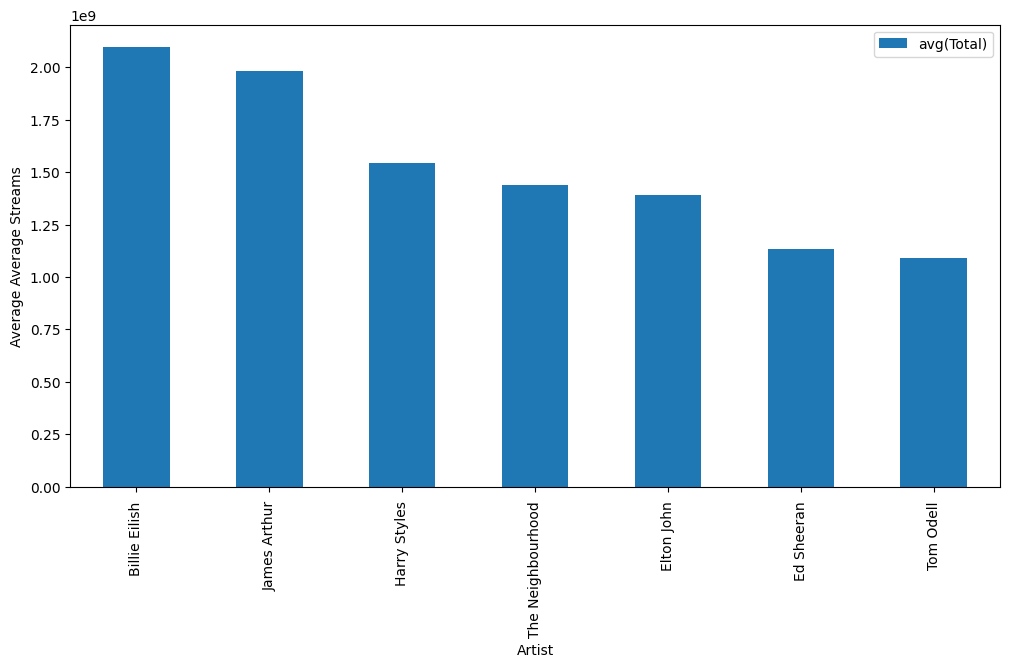

In [ ]:
vis_df = (
    df.select(["Artist", "Wks", "Total"])
    .groupBy("Artist")
    .mean()
    .orderBy(["avg(Total)"], ascending=[False])
    .toPandas()
)

vis_df.iloc[0:7].plot(
    kind="bar",
    x="Artist",
    y="avg(Total)",
    figsize=(12, 6),
    ylabel="Average Average Streams",
)

In [ ]:
final_data = (
    df.select(["Artist", "Wks", "Total"])
    .groupBy("Artist")
    .mean()
    .orderBy(["avg(Total)"], ascending=[False])
)

# CSV
final_data.write.csv("dataset.csv")

In [ ]:
final_data.count()

125

### Data pre processing

In [ ]:
from pyspark.ml.feature import (
    VectorAssembler,
    StringIndexer,
    OneHotEncoder,
    StandardScaler,
)

In [ ]:
## Categorical Encoding
indexer = StringIndexer(inputCol="Artist", outputCol="Encode_Artist").fit(
    final_data
)
encoded_df = indexer.transform(final_data)

In [ ]:
encoded_df.show()

+------------------+--------+--------------------+-------------+
|            Artist|avg(Wks)|          avg(Total)|Encode_Artist|
+------------------+--------+--------------------+-------------+
|    Billie Eilish |   254.0|       2.098789064E9|          8.0|
|     James Arthur |   290.0|       1.983256195E9|         42.0|
|     Harry Styles |    87.0|1.5457005193333333E9|         34.0|
|The Neighbourhood |   156.0|       1.440976493E9|        108.0|
|       Elton John |    81.0|       1.388794442E9|         26.0|
|       Ed Sheeran |    77.0|       1.134167144E9|         24.0|
|        Tom Odell |    99.0|       1.089197962E9|        113.0|
|       Conan Gray |   136.0|       1.085427136E9|         19.0|
|        Vance Joy |   238.0|       1.003744076E9|        116.0|
|         J Balvin |   106.0|        9.17144342E8|         39.0|
|    Justin Bieber |    76.0|         9.0641152E8|         45.0|
|      OneRepublic |   144.0|       8.930579985E8|         79.0|
|        Bad Bunny |    4

In [ ]:
## Assembling Features
assemble = VectorAssembler(
    inputCols=["Encode_Artist", "avg(Wks)", "avg(Total)"],
    outputCol="features",
)

assembled_data = assemble.transform(encoded_df)

In [ ]:
assembled_data.show()

+------------------+--------+--------------------+-------------+--------------------+
|            Artist|avg(Wks)|          avg(Total)|Encode_Artist|            features|
+------------------+--------+--------------------+-------------+--------------------+
|    Billie Eilish |   254.0|       2.098789064E9|          8.0|[8.0,254.0,2.0987...|
|     James Arthur |   290.0|       1.983256195E9|         42.0|[42.0,290.0,1.983...|
|     Harry Styles |    87.0|1.5457005193333333E9|         34.0|[34.0,87.0,1.5457...|
|The Neighbourhood |   156.0|       1.440976493E9|        108.0|[108.0,156.0,1.44...|
|       Elton John |    81.0|       1.388794442E9|         26.0|[26.0,81.0,1.3887...|
|       Ed Sheeran |    77.0|       1.134167144E9|         24.0|[24.0,77.0,1.1341...|
|        Tom Odell |    99.0|       1.089197962E9|        113.0|[113.0,99.0,1.089...|
|       Conan Gray |   136.0|       1.085427136E9|         19.0|[19.0,136.0,1.085...|
|        Vance Joy |   238.0|       1.003744076E9|    

In [ ]:
assembled_data.select(assembled_data.features).show()

+--------------------+
|            features|
+--------------------+
|[8.0,254.0,2.0987...|
|[42.0,290.0,1.983...|
|[34.0,87.0,1.5457...|
|[108.0,156.0,1.44...|
|[26.0,81.0,1.3887...|
|[24.0,77.0,1.1341...|
|[113.0,99.0,1.089...|
|[19.0,136.0,1.085...|
|[116.0,238.0,1.00...|
|[39.0,106.0,9.171...|
|[45.0,76.0,9.0641...|
|[79.0,144.0,8.930...|
|[5.0,43.0,8.91088...|
|[97.0,23.0,8.8957...|
|[65.0,35.0,8.6964...|
|[40.0,167.0,7.831...|
|[43.0,38.0,7.7555...|
|[93.0,81.0,7.5920...|
|[22.0,27.0,7.4352...|
|[9.0,21.0,7.12091...|
+--------------------+
only showing top 20 rows



In [ ]:
# Standard Scaling
scale = StandardScaler(inputCol = "features", outputCol="Standardize")
data_scale = scale.fit(assembled_data)
data_scale_output = data_scale.transform(assembled_data)
data_scale_output.show(5)

+------------------+--------+--------------------+-------------+--------------------+--------------------+
|            Artist|avg(Wks)|          avg(Total)|Encode_Artist|            features|         Standardize|
+------------------+--------+--------------------+-------------+--------------------+--------------------+
|    Billie Eilish |   254.0|       2.098789064E9|          8.0|[8.0,254.0,2.0987...|[0.22082097898955...|
|     James Arthur |   290.0|       1.983256195E9|         42.0|[42.0,290.0,1.983...|[1.15931013969515...|
|     Harry Styles |    87.0|1.5457005193333333E9|         34.0|[34.0,87.0,1.5457...|[0.93848916070560...|
|The Neighbourhood |   156.0|       1.440976493E9|        108.0|[108.0,156.0,1.44...|[2.98108321635897...|
|       Elton John |    81.0|       1.388794442E9|         26.0|[26.0,81.0,1.3887...|[0.71766818171604...|
+------------------+--------+--------------------+-------------+--------------------+--------------------+
only showing top 5 rows



# Kmean Elbow Method
The elbow method is a graphical representation of finding the optimal ‘K’ in a K-means clustering.In the Elbow method, we are actually varying the number of clusters (K) from 1 – 10. For each value of K, we are calculating WCSS (Within-Cluster Sum of Square). WCSS is the sum of the squared distance between each point and the centroid in a cluster. When we plot the WCSS with the K value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decrease. WCSS value is largest when K = 1. When we analyze the graph, we can see that the graph will rapidly change at a point and thus creating an elbow shape. From this point, the graph moves almost parallel to the X-axis. The K value corresponding to this point is the optimal value of K or an optimal number of clusters.

In [ ]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
import numpy as np

cost = np.zeros(10)

evaluator = ClusteringEvaluator(predictionCol="prediction", featuresCol="Standardize", metricName="silhouette", distanceMeasure="squaredEuclidean")

for i in range(2,10):
  KMeans_algo = KMeans(featuresCol="Standardize", k=i)
  KMeans_fit = KMeans_algo.fit(data_scale_output)
  outout = KMeans_fit.transform(data_scale_output)
  cost[i] = KMeans_fit.summary.trainingCost
  print(cost[i])

221.88781506611326
140.53755368489877
107.6652251391477
90.82424440056546
71.3510928138665
58.62274336658289
57.44300440344592
44.11560014164921


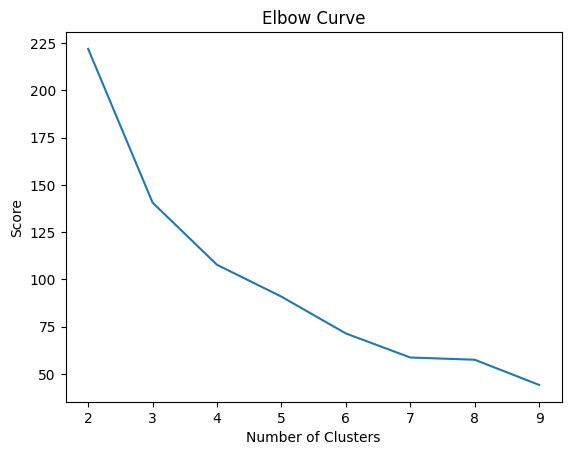

In [ ]:
import pandas as pd
import pylab as pl
df_cost = pd.DataFrame(cost[2:])
df_cost.columns = ["cost"]
new_col = range(2,10)
df_cost.insert(0, 'cluster', new_col)
pl.plot(df_cost.cluster, df_cost.cost)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

# KMeans Clustering

In [ ]:
from pyspark.ml.clustering import KMeans
KMeans_algo = KMeans(featuresCol="Standardize", k=4)
KMeans_fit = KMeans_algo.fit(data_scale_output)

In [ ]:
preds = KMeans_fit.transform(data_scale_output)
preds.show()

+------------------+--------+--------------------+-------------+--------------------+--------------------+----------+
|            Artist|avg(Wks)|          avg(Total)|Encode_Artist|            features|         Standardize|prediction|
+------------------+--------+--------------------+-------------+--------------------+--------------------+----------+
|    Billie Eilish |   254.0|       2.098789064E9|          8.0|[8.0,254.0,2.0987...|[0.22082097898955...|         1|
|     James Arthur |   290.0|       1.983256195E9|         42.0|[42.0,290.0,1.983...|[1.15931013969515...|         1|
|     Harry Styles |    87.0|1.5457005193333333E9|         34.0|[34.0,87.0,1.5457...|[0.93848916070560...|         2|
|The Neighbourhood |   156.0|       1.440976493E9|        108.0|[108.0,156.0,1.44...|[2.98108321635897...|         1|
|       Elton John |    81.0|       1.388794442E9|         26.0|[26.0,81.0,1.3887...|[0.71766818171604...|         2|
|       Ed Sheeran |    77.0|       1.134167144E9|      

# Model Evaluation

<ipython-input-25-0af6a0308802>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_df = df_viz.groupby(['prediction'], as_index=False).mean()


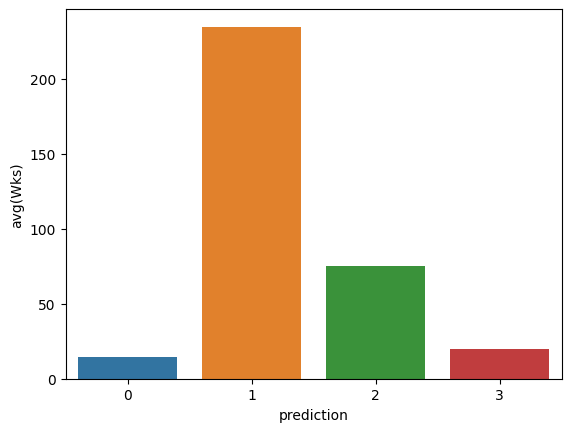

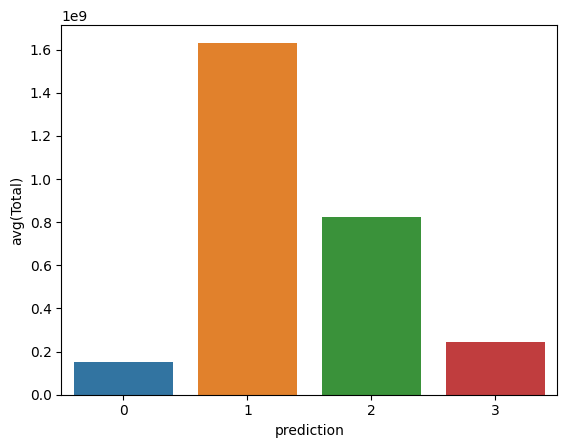

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_viz = preds.select('Artist', 'avg(Wks)','avg(Total)','prediction').toPandas()
avg_df = df_viz.groupby(['prediction'], as_index=False).mean()

list1 = ['avg(Wks)','avg(Total)']

for i in list1:
    sns.barplot(x='prediction',y=str(i),data=avg_df)
    plt.show()